In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import timeit

In [164]:
def plot_style(figsize=(12, 6), labelsize=20, titlesize=24, ticklabelsize=14, **kwargs):
   basic_style = {
       'figure.figsize': figsize,
       'axes.labelsize': labelsize,
       'axes.titlesize': titlesize,
       'xtick.labelsize': ticklabelsize,
       'ytick.labelsize': ticklabelsize,
       'axes.spines.top': False,
       'axes.spines.right': False,
       'axes.spines.left': True,
       'axes.grid': True,
       'axes.grid.axis': 'both',
   }
   basic_style.update(kwargs)
   return plt.rc_context(rc=basic_style)


def plot_time_increase(multipliers, timing, ax=None, color='red', ls='-'):    
    if ax is None:
        ax = plt.gca()
    ax.plot(multipliers, timing, lw=3, ls=ls, color=color)
    ax.set_xticks(list(range(1, multipliers[-1] + 2, 2)))
    ax.set_xlabel('N')
    ax.set_ylabel('Time (s)')
    ax.set_xlim(0, multipliers[-1] + 1.1)
    ax.set_ylim(0, 0.06)


def measure_time_increase(func, words1, words2, max_mult=20, z=1):
    timing = []
    multipliers = list(range(1, max_mult + 1))
    for mult in multipliers:
        mult_words1 = words1 * mult
        mult_words2 = words2 * mult
        t = timeit.repeat(
            'func(words1, words2)', 
            globals={'func': func, 'words1': mult_words1, 'words2': mult_words2}, 
            repeat=3,
            number=3000
        )
        timing.append(min(t) * z)
    return multipliers, timing

# Example: Find common words

Problem: given two lists of words, extract all the words that are in common

In [165]:
results = {}

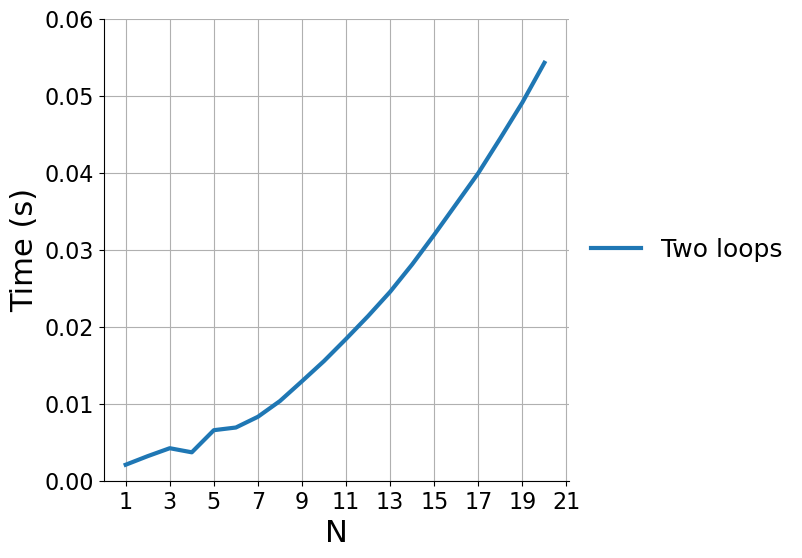

In [168]:
def two_loops(words1, words2):
    common = []
    for w in words1:
        if w in words2:
            common.append(w)
    return common


words1 = ['apple', 'orange', 'banana', 'melon', 'peach']
words2 = ['orange', 'kiwi', 'avocado', 'apple', 'banana']
multipliers, timing = measure_time_increase(two_loops, words1, words2)

results['Two loops'] = (multipliers, timing)
with plot_style(figsize=(6, 6), ticklabelsize=16, labelsize=22):
    plot_time_increase(*results['Two loops'], ax=None, color='tab:blue', ls='-')
    plt.legend(['Two loops', 'Sorted lists', 'Sets'], 
               title=None, fontsize=18, loc='center left', 
               bbox_to_anchor=(1, 0.5), frameon=False)


In [ ]:
common = []
for w in words1:        # O(N)
    if w in words2:       # O(N)
        common.append(w)  # O(1)


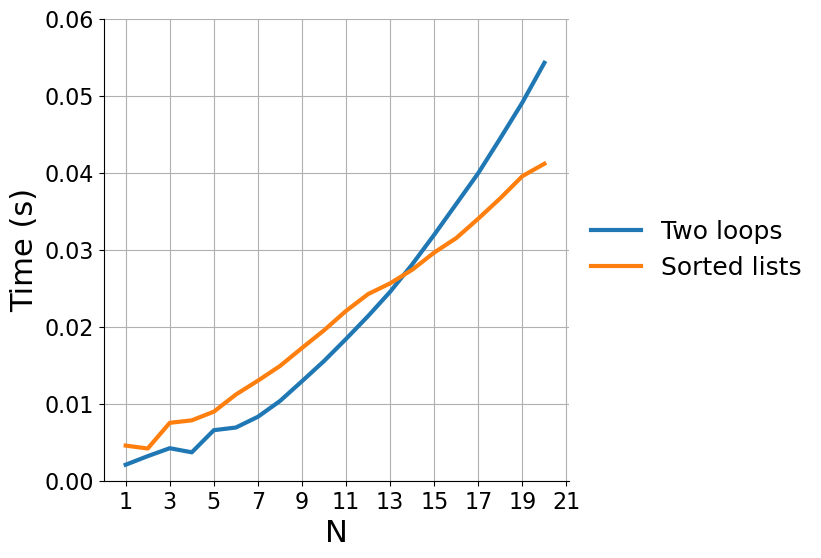

In [169]:
def sorted_lists(words1, words2):
    words1 = sorted(words1)
    words2 = sorted(words2)

    common = []
    idx2 = 0
    for w in words1:
        while idx2 < len(words2) and words2[idx2] < w:
            idx2 += 1

        if idx2 >= len(words2):
            break

        if words2[idx2] == w:
            common.append(w)
            
    return common

words1 = ['apple', 'orange', 'banana', 'melon', 'peach']
words2 = ['orange', 'kiwi', 'avocado', 'apple', 'banana']
multipliers, timing = measure_time_increase(sorted_lists, words1, words2)

results['Sorted lists'] = (multipliers, timing)
with plot_style(figsize=(6, 6), ticklabelsize=16, labelsize=22):
    plot_time_increase(*results['Two loops'], ax=None, color='tab:blue', ls='-')
    plot_time_increase(*results['Sorted lists'], ax=None, color='tab:orange', ls='-')
    plt.legend(['Two loops', 'Sorted lists', 'Sets'], 
               title=None, fontsize=18, loc='center left', 
               bbox_to_anchor=(1, 0.5), frameon=False)


In [ ]:
words1 = sorted(words1)     # O(N * log(N))
words2 = sorted(words2)     # O(N * log(N))

common = []
idx2 = 0
for w in words1:                                    # O(N)
    while idx2 < len(words2) and words2[idx2] < w:  # O(N) in total
        idx2 += 1

    if idx2 >= len(words2): # O(1)
        break

    if words2[idx2] == w:   # O(1)
        common.append(w)


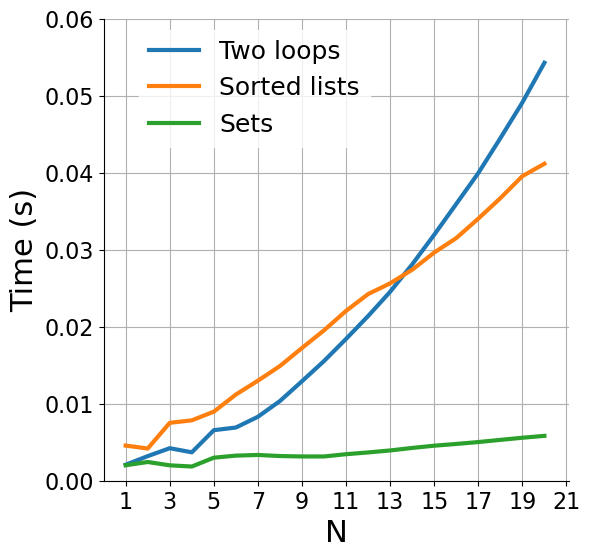

In [196]:
def sets(words1, words2):
    words2 = set(words2)

    common = []
    for w in words1:
        if w in words2:
            common.append(w)

    return common


words1 = ['apple', 'orange', 'banana', 'melon', 'peach']
words2 = ['orange', 'kiwi', 'avocado', 'apple', 'banana']
multipliers, timing = measure_time_increase(sets, words1, words2)

results['Sets'] = (multipliers, timing)
with plot_style(figsize=(6, 6), ticklabelsize=16, labelsize=22):
    plot_time_increase(*results['Two loops'], ax=None, color='tab:blue', ls='-')
    plot_time_increase(*results['Sorted lists'], ax=None, color='tab:orange', ls='-')
    plot_time_increase(*results['Sets'], ax=None, color='tab:green', ls='-')
    plt.legend(['Two loops', 'Sorted lists', 'Sets'], 
               title=None, fontsize=18, loc='center left', 
               bbox_to_anchor=(0.05, 0.85), frameon=True, facecolor='white', framealpha=0.8, edgecolor='white')


In [ ]:
words2 = set(words2)      # O(N)

common = []
for w in words1:          # O(N)
    if w in words2:          # O(1)
        common.append(w)     # O(1)


In [172]:
words1 = ['apple', 'orange', 'banana', 'melon', 'peach']
words2 = ['orange', 'kiwi', 'avocado', 'apple', 'banana']
multipliers, timing = measure_time_increase(two_loops, words1, words2, z=0.6)

results['Two loops (fast)'] = (multipliers, timing)


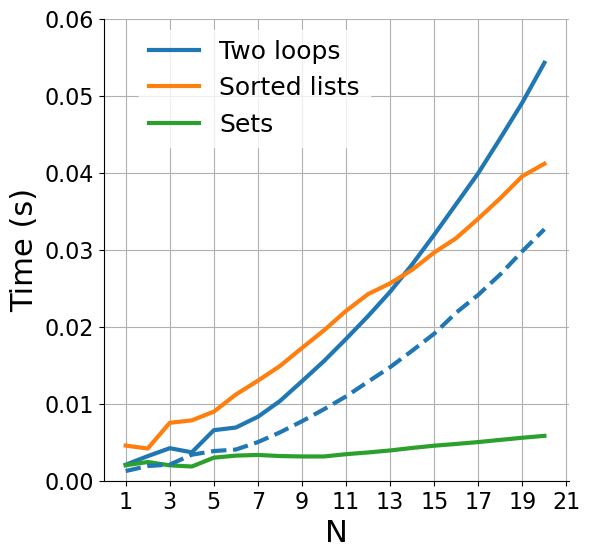

In [197]:
with plot_style(figsize=(6, 6), ticklabelsize=16, labelsize=22):
    plot_time_increase(*results['Two loops'], ax=None, color='tab:blue', ls='-')
    plot_time_increase(*results['Sorted lists'], ax=None, color='tab:orange', ls='-')
    plot_time_increase(*results['Sets'], ax=None, color='tab:green', ls='-')
    plot_time_increase(*results['Two loops (fast)'], ax=None, color='tab:blue', ls='--')
    plt.legend(['Two loops', 'Sorted lists', 'Sets'], 
               title=None, fontsize=18, loc='center left', 
               bbox_to_anchor=(0.05, 0.85), frameon=True, facecolor='white', framealpha=0.8, edgecolor='white')


In [182]:
words1 = ['apple', 'orange', 'banana', 'melon', 'peach']
words2 = ['orange', 'kiwi', 'avocado', 'apple', 'banana']
results_longer = {}
max_mult = 40
results_longer['Two loops'] = measure_time_increase(two_loops, words1, words2, max_mult=max_mult)
results_longer['Two loops (fast)'] = measure_time_increase(two_loops, words1, words2, z=0.6, max_mult=max_mult)
results_longer['Sorted lists'] = measure_time_increase(sorted_lists, words1, words2, max_mult=max_mult)
results_longer['Sets'] = measure_time_increase(sets, words1, words2, max_mult=max_mult)


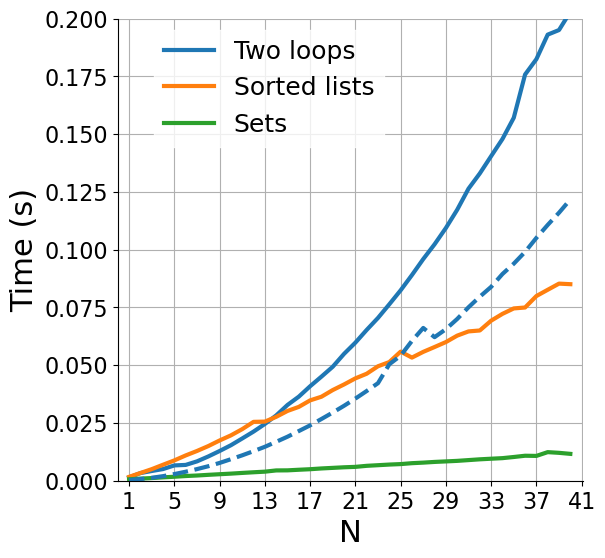

In [201]:
with plot_style(figsize=(6, 6), ticklabelsize=16, labelsize=22):
    plot_time_increase(*results_longer['Two loops'], ax=None, color='tab:blue', ls='-')
    plot_time_increase(*results_longer['Sorted lists'], ax=None, color='tab:orange', ls='-')
    plot_time_increase(*results_longer['Sets'], ax=None, color='tab:green', ls='-')
    plot_time_increase(*results_longer['Two loops (fast)'], ax=None, color='tab:blue', ls='--')
    plt.legend(['Two loops', 'Sorted lists', 'Sets'], 
               title=None, fontsize=18, loc='center left', 
               bbox_to_anchor=(0.05, 0.85), frameon=True, facecolor='white', framealpha=0.8, edgecolor='white')
    plt.ylim(0, 0.2)
    plt.xticks(list(range(1, max_mult + 2, 4)))

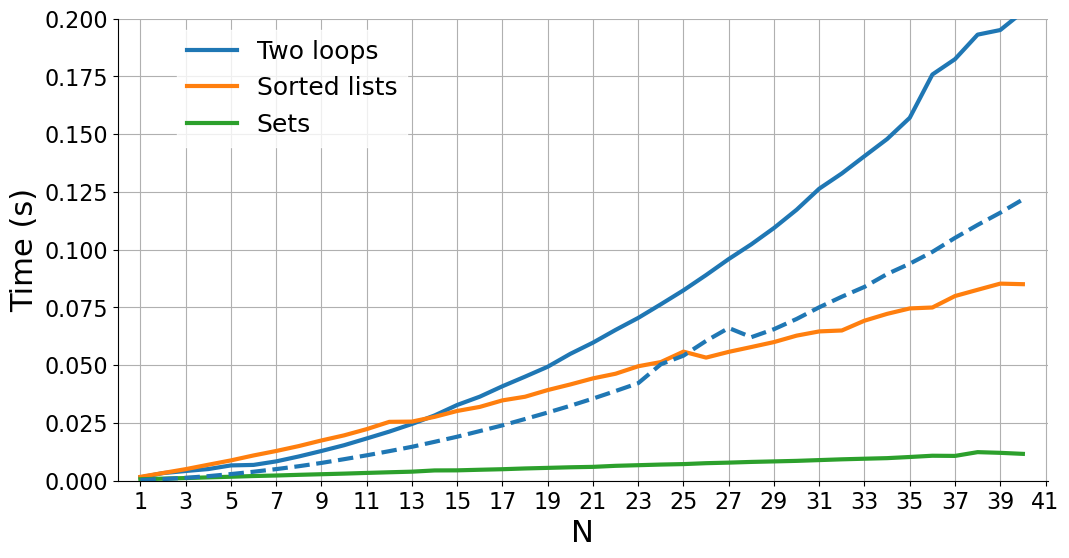

In [203]:
with plot_style(figsize=(12, 6), ticklabelsize=16, labelsize=22):
    plot_time_increase(*results_longer['Two loops'], ax=None, color='tab:blue', ls='-')
    plot_time_increase(*results_longer['Sorted lists'], ax=None, color='tab:orange', ls='-')
    plot_time_increase(*results_longer['Sets'], ax=None, color='tab:green', ls='-')
    plot_time_increase(*results_longer['Two loops (fast)'], ax=None, color='tab:blue', ls='--')
    plt.legend(['Two loops', 'Sorted lists', 'Sets'], 
               title=None, fontsize=18, loc='center left', 
               bbox_to_anchor=(0.05, 0.85), frameon=True, facecolor='white', framealpha=0.8, edgecolor='white')
    plt.ylim(0, 0.2)
    plt.xticks(list(range(1, max_mult + 2, 2)))